In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## 1. Carga de datos y análisis exploratorio

In [2]:
# Cargar el dataset de ejemplo
df = pd.read_csv('publicidad_ventas_ejemplo.csv')
df.head()

,Publicidad,Ventas
0,1.0,5.5
1,1.5,6.8
2,2.0,7.9
3,2.5,9.2
4,3.0,9.8


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Publicidad  26 non-null     float64
 1   Ventas      26 non-null     float64
dtypes: float64(2)
memory usage: 548.0 bytes


In [4]:
# Estadísticas descriptivas
df.describe()

,Publicidad,Ventas
count,26.000000,26.000000
mean,5.153846,14.969231
std,2.580733,5.834776
min,1.000000,5.500000
25%,3.125000,10.100000
50%,5.250000,15.400000
75%,7.375000,20.100000
max,9.500000,24.900000


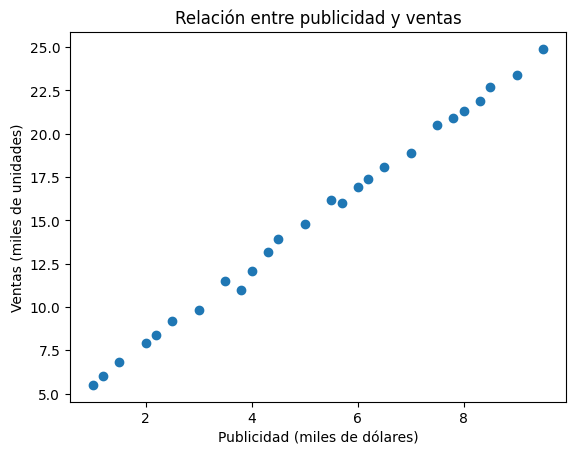

In [5]:
# Visualización de la relación entre publicidad y ventas
plt.scatter(df['Publicidad'], df['Ventas'])
plt.xlabel('Publicidad (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.title('Relación entre publicidad y ventas')
plt.show()

**Insight inicial:**\n
Se observa una relación aproximadamente lineal y creciente: a mayor inversión en publicidad, mayores ventas esperadas.

## 2. Implementación del algoritmo de descenso de gradiente para regresión lineal

In [6]:
# Preparar los datos como arreglos de NumPy
X = df['Publicidad'].values
y = df['Ventas'].values
n = len(X)  # cantidad de observaciones

# Inicializar parámetros del modelo: Ventas = m * Publicidad + b
m = 0.0  # pendiente
b = 0.0  # intercepto

# Hiperparámetros del descenso de gradiente
learning_rate = 0.01   # tasa de aprendizaje
epochs = 1000          # número de iteraciones

# Para guardar la evolución de la función de costo
losses = []

for epoch in range(epochs):
    # Predicciones actuales
    y_pred = m * X + b
    
    # Costo (MSE) solo para monitoreo
    loss = mean_squared_error(y, y_pred)
    losses.append(loss)
    
    # Derivadas parciales de la función de costo respecto de m y b
    D_m = (-2/n) * np.sum(X * (y - y_pred))
    D_b = (-2/n) * np.sum(y - y_pred)
    
    # Actualización de parámetros en la dirección opuesta al gradiente
    m = m - learning_rate * D_m
    b = b - learning_rate * D_b

print(f'Parámetros finales: m = {m:.4f}, b = {b:.4f}')

Parámetros finales: m = 2.2686, b = 3.2648


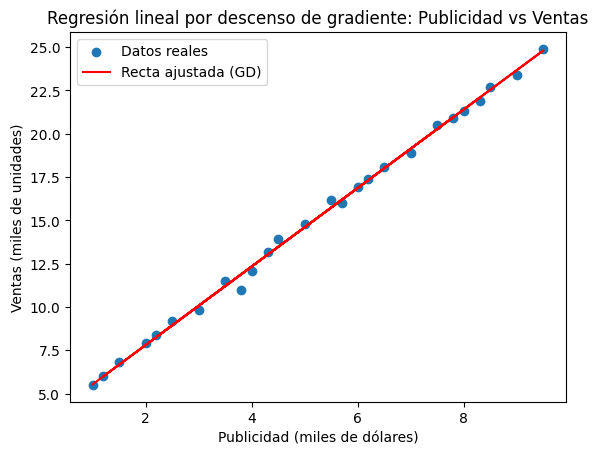

In [7]:
# Visualizar la recta ajustada sobre los datos
plt.scatter(X, y, label='Datos reales')
plt.plot(X, m * X + b, color='red', label='Recta ajustada (GD)')
plt.xlabel('Publicidad (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.title('Regresión lineal por descenso de gradiente: Publicidad vs Ventas')
plt.legend()
plt.show()

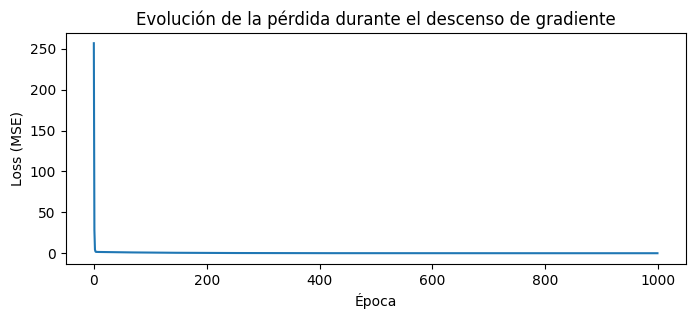

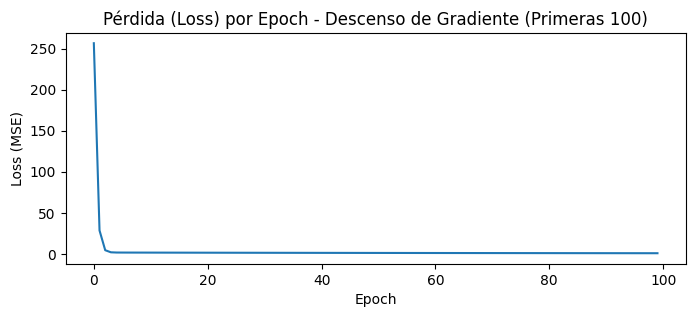

In [10]:
# Curva de la función de costo (MSE) a lo largo de las épocas
plt.figure(figsize=(8,3))
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución de la pérdida durante el descenso de gradiente')
plt.show()

plt.figure(figsize=(8,3))
plt.plot(losses[:100])
plt.title('Pérdida (Loss) por Epoch - Descenso de Gradiente (Primeras 100)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()

## 3. Métricas de ajuste y error del modelo

In [9]:
# Predicciones finales con los parámetros aprendidos
y_pred_final = m * X + b

# Cálculo de métricas de error y ajuste
mse = mean_squared_error(y, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_final)

print(f'MSE : {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2 : {r2:.4f}')

MSE : 0.0733
RMSE: 0.2707
R^2 : 0.9978


**Interpretación de las métricas:**
- Un MSE y RMSE bajos indican que las predicciones del modelo de ventas están, en promedio, cerca de los valores reales.
- Un $R^2$ cercano a 1 indica que el modelo explica gran parte de la variabilidad de las ventas a partir de la inversión en publicidad.

Puedes usar este notebook como plantilla para construir tu solución del caso `StudentScore`, cambiando:

- El enunciado.
- El archivo de datos (`student_scores.csv`).
- Los nombres de las columnas (por ejemplo, `Hours` y `Scores`).